# **Stroke Classifier - Demo**

In [1]:
import pandas as pd
import numpy as np
from classifiers.LinearClassifier import LinearClassifier
from classifiers.TreeClassifier import TreeClassifier

# ***Primeiro Teste***: sem poda do DataFrame

In [2]:
# Carrega o DataFrame
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Classificador Linear**

In [26]:
# Testa o LinearClassifier com o DataFrame

clf = LinearClassifier(df)
clf.fit()
clf.score()
print(f'LinearClassifier accuracy: {clf.accuracy() * 100 :.2f}%\n')

# Printa as 5 features mais importantes segundo o LinearClassifier

print(f'LinearClassifier most important features:')
for i in range(1, 6):
    print(f'{i}. {clf.X.columns[np.argsort(clf.w.T)[0][-i]]}')


LinearClassifier accuracy: 95.36%

LinearClassifier most important features:
1. ever_married_No
2. bmi_overweight
3. ever_married_Yes
4. bmi_normal
5. bmi_obese


### **Analisando o `y_predict`**

In [27]:
print(clf.y_est)
print(f'Número total de predições: {clf.y_est.shape[1]}')
print(f'Número de predições para AVC (positivo): {np.sum(clf.y_est > 0)}')
print(f'Número de predições para não AVC (negativo): {np.sum(clf.y_est < 0)}')


[[-1.00472045 -0.96063985 -0.98943573 ... -0.69447125 -0.99192426
  -0.83944748]]
Número total de predições: 2455
Número de predições para AVC (positivo): 0
Número de predições para não AVC (negativo): 2455


### **Hipótese Nula**

Sempre comparamos a nossa acurácia com a porcentagem de acerto caso o classificador apenas chutasse a mesma resposta, no caso, a mais frequente do DataFrame.

In [28]:
# Descobre se temos mais 1s ou -1s no y_test

print(f'Number of 1s in y_test: {np.sum(clf.y_test == 1)}')
print(f'Number of -1s in y_test: {np.sum(clf.y_test == -1)}')

# Cria um Numpy array do tamanho do y_test com apenas -1s

y_test = np.ones(clf.y_test.shape) * -1

# Compara a acurácia do classificador com um que chuta -1 para tudo

print(f'\nLinearClassifier accuracy vs. -1s classifier accuracy: {clf.accuracy() * 100 :.2f}% vs. {np.mean(np.sign(clf.y_test)==np.sign(y_test)) * 100 :.2f}%')

Number of 1s in y_test: 114
Number of -1s in y_test: 2341

LinearClassifier accuracy vs. -1s classifier accuracy: 95.36% vs. 95.36%


## **Classificador de Árvore de Decisão**

In [29]:
# Testa o TreeClassifier com o DataFrame

clf = TreeClassifier(df)
clf.fit()
clf.score()
print(f'TreeClassifier accuracy: {clf.accuracy() * 100 :.2f}%\n')

# Printa as 5 features mais importantes segundo o TreeClassifier

print(f'TreeClassifier most important features:')
for i in range(1, 6):
    print(f'{i}. {clf.X.columns[np.argsort(clf.tree.feature_importances_)[-i]]}')

TreeClassifier accuracy: 93.60%

TreeClassifier most important features:
1. age_elder
2. work_type_Private
3. smoking_status_never smoked
4. Residence_type_Urban
5. gender_Female


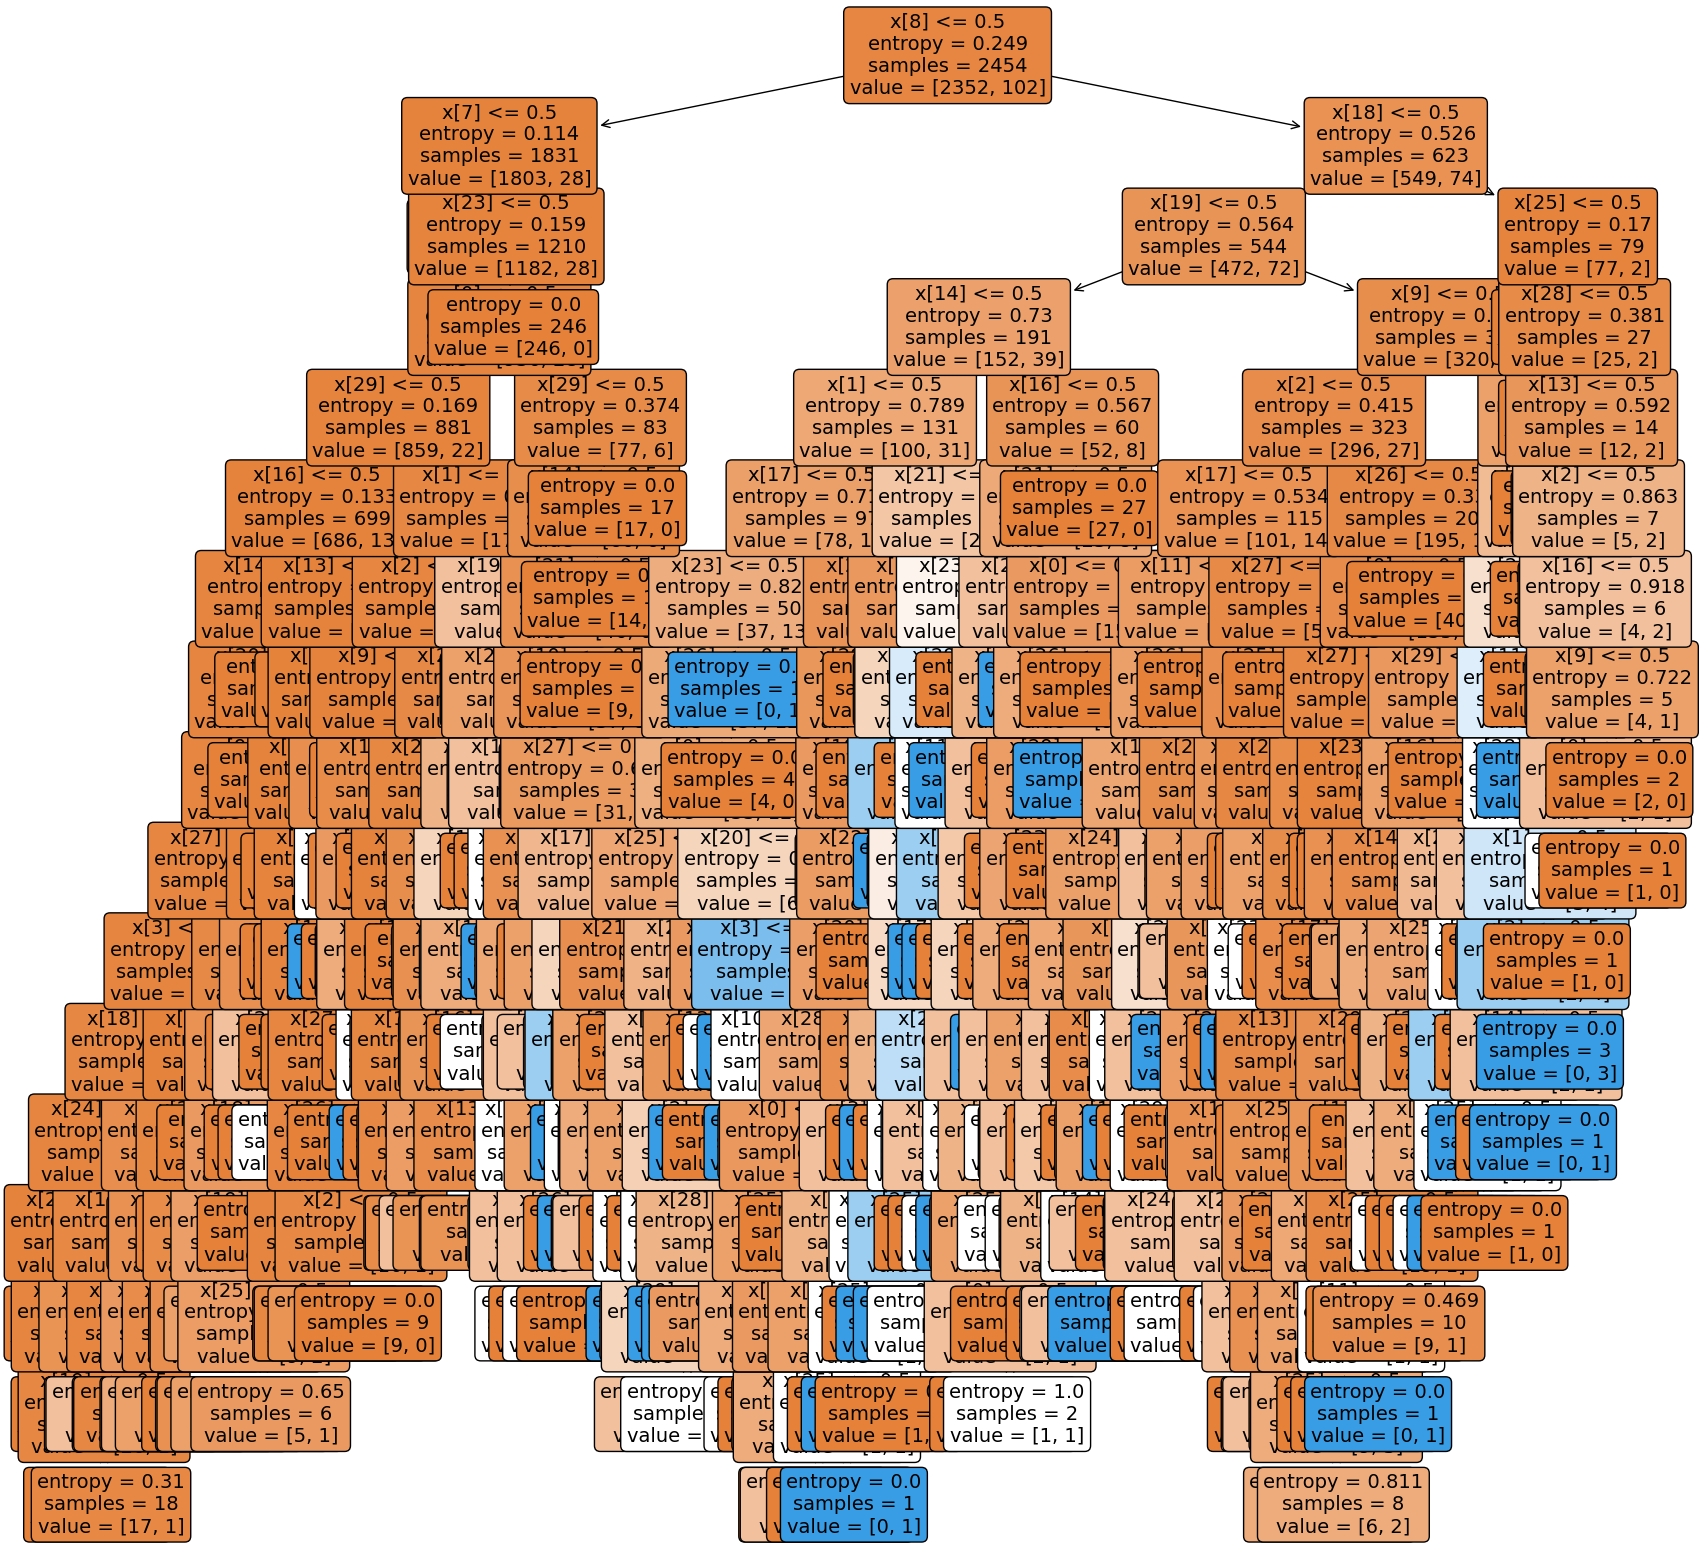

In [14]:
# Plota a árvore de decisão do TreeClassifier

clf.plot()

### **Analisando o `y_predict`**

In [34]:
print(clf.y_est)
print(f'Número total de predições: {clf.y_est.shape[0]}')
print(f'Número de predições para AVC (positivo): {np.sum(clf.y_est > 0)}')
print(f'Número de predições para não AVC (negativo): {np.sum(clf.y_est < 0)}')


[ 1. -1. -1. ... -1. -1. -1.]
Número total de predições: 2455
Número de predições para AVC (positivo): 78
Número de predições para não AVC (negativo): 2377


### **Hipótese Nula**

Sempre comparamos a nossa acurácia com a porcentagem de acerto caso o classificador apenas chutasse a mesma resposta, no caso, a mais frequente do DataFrame.

In [35]:
# Descobre se temos mais 1s ou -1s no y_test

print(f'Number of 1s in y_test: {np.sum(clf.y_test == 1)}')
print(f'Number of -1s in y_test: {np.sum(clf.y_test == -1)}')

# Cria um Numpy array do tamanho do y_test com apenas -1s

y_test = np.ones(clf.y_test.shape) * -1

# Compara a acurácia do classificador com um que chuta -1 para tudo

print(f'\nTreeClassifier accuracy vs. -1s classifier accuracy: {clf.accuracy() * 100 :.2f}% vs. {np.mean(np.sign(clf.y_test)==np.sign(y_test)) * 100 :.2f}%')

Number of 1s in y_test: 99
Number of -1s in y_test: 2356

TreeClassifier accuracy vs. -1s classifier accuracy: 93.60% vs. 95.97%


# **Problema**

Nossos classificadores chutam todos como não tendo AVC. A hipótese é que isso está ocorrendo pois há muito mais casos que não tiveram AVC do que tiveram AVC no dataset, o que dá *bias* aos dados. Portanto, será preciso podar, por exemplo, ao analisar um subset do dataset com o mesmo número de casos com AVC do que sem AVC. 

---

# ***Segundo Teste***: com poda do DataFrame

Vamos ter apenas metade dos dados com AVC e metade dos dados sem AVC, o equilibrando.

In [39]:
# Carrega o DataFrame

df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

# Poda o DataFrame para ter o mesmo número de stroke = 1 e stroke = 0

df = df[df['stroke'] == 1].append(df[df['stroke'] == 0].sample(n=df[df['stroke'] == 1].shape[0]))

df.head()

C:\Users\neodr\AppData\Local\Temp\ipykernel_4852\3958300238.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df[df['stroke'] == 1].append(df[df['stroke'] == 0].sample(n=df[df['stroke'] == 1].shape[0]))


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [40]:
print(f'Número de casos com AVC: {df[df["stroke"] == 1].shape[0]}')
print(f'Número de casos sem AVC: {df[df["stroke"] == 0].shape[0]}')

Número de casos com AVC: 249
Número de casos sem AVC: 249


## **Classificador Linear**

In [44]:
# Testa o LinearClassifier com o DataFrame

clf = LinearClassifier(df)
clf.fit()
clf.score()
print(f'LinearClassifier accuracy: {clf.accuracy() * 100 :.2f}%\n')

# Printa as 5 features mais importantes segundo o LinearClassifier

print(f'LinearClassifier most important features:')
for i in range(1, 6):
    print(f'{i}. {clf.X.columns[np.argsort(clf.w.T)[0][-i]]}')

LinearClassifier accuracy: 72.32%

LinearClassifier most important features:
1. ever_married_Yes
2. Residence_type_Urban
3. avg_glucose_level_high
4. ever_married_No
5. age_elder


### **Analisando o `y_predict`**

In [46]:
print(f'Número total de predições: {clf.y_est.shape[1]}')
print(f'Número de predições para AVC (positivo): {np.sum(clf.y_est > 0)}')
print(f'Número de predições para não AVC (negativo): {np.sum(clf.y_est < 0)}')

Número total de predições: 224
Número de predições para AVC (positivo): 110
Número de predições para não AVC (negativo): 114


### **Analisando (novamente) a Hipótese Nula**

Agora com poda nos dados.

In [47]:
# Descobre se temos mais 1s ou -1s no y_test

print(f'Number of 1s in y_test: {np.sum(clf.y_test == 1)}')
print(f'Number of -1s in y_test: {np.sum(clf.y_test == -1)}')

# Cria um Numpy array do tamanho do y_test com apenas 1s

y_test = np.ones(clf.y_test.shape) * 1

# Compara a acurácia do classificador com um que chuta 1 para tudo

print(f'\nLinearClassifier accuracy vs. 1s classifier accuracy: {clf.accuracy() * 100 :.2f}% vs. {np.mean(np.sign(clf.y_test)==np.sign(y_test)) * 100 :.2f}%')

Number of 1s in y_test: 112
Number of -1s in y_test: 112

LinearClassifier accuracy vs. 1s classifier accuracy: 72.32% vs. 50.00%


## **Classificador de Árvore de Decisão**

In [56]:
# Testa o TreeClassifier com o DataFrame

clf = TreeClassifier(df)
clf.fit()
clf.score()
print(f'TreeClassifier accuracy: {clf.accuracy() * 100 :.2f}%\n')

# Printa as 5 features mais importantes segundo o TreeClassifier

print(f'TreeClassifier most important features:')
for i in range(1, 6):
    print(f'{i}. {clf.X.columns[np.argsort(clf.tree.feature_importances_)[-i]]}')

TreeClassifier accuracy: 66.07%

TreeClassifier most important features:
1. age_elder
2. ever_married_Yes
3. bmi_obese
4. Residence_type_Rural
5. smoking_status_never smoked


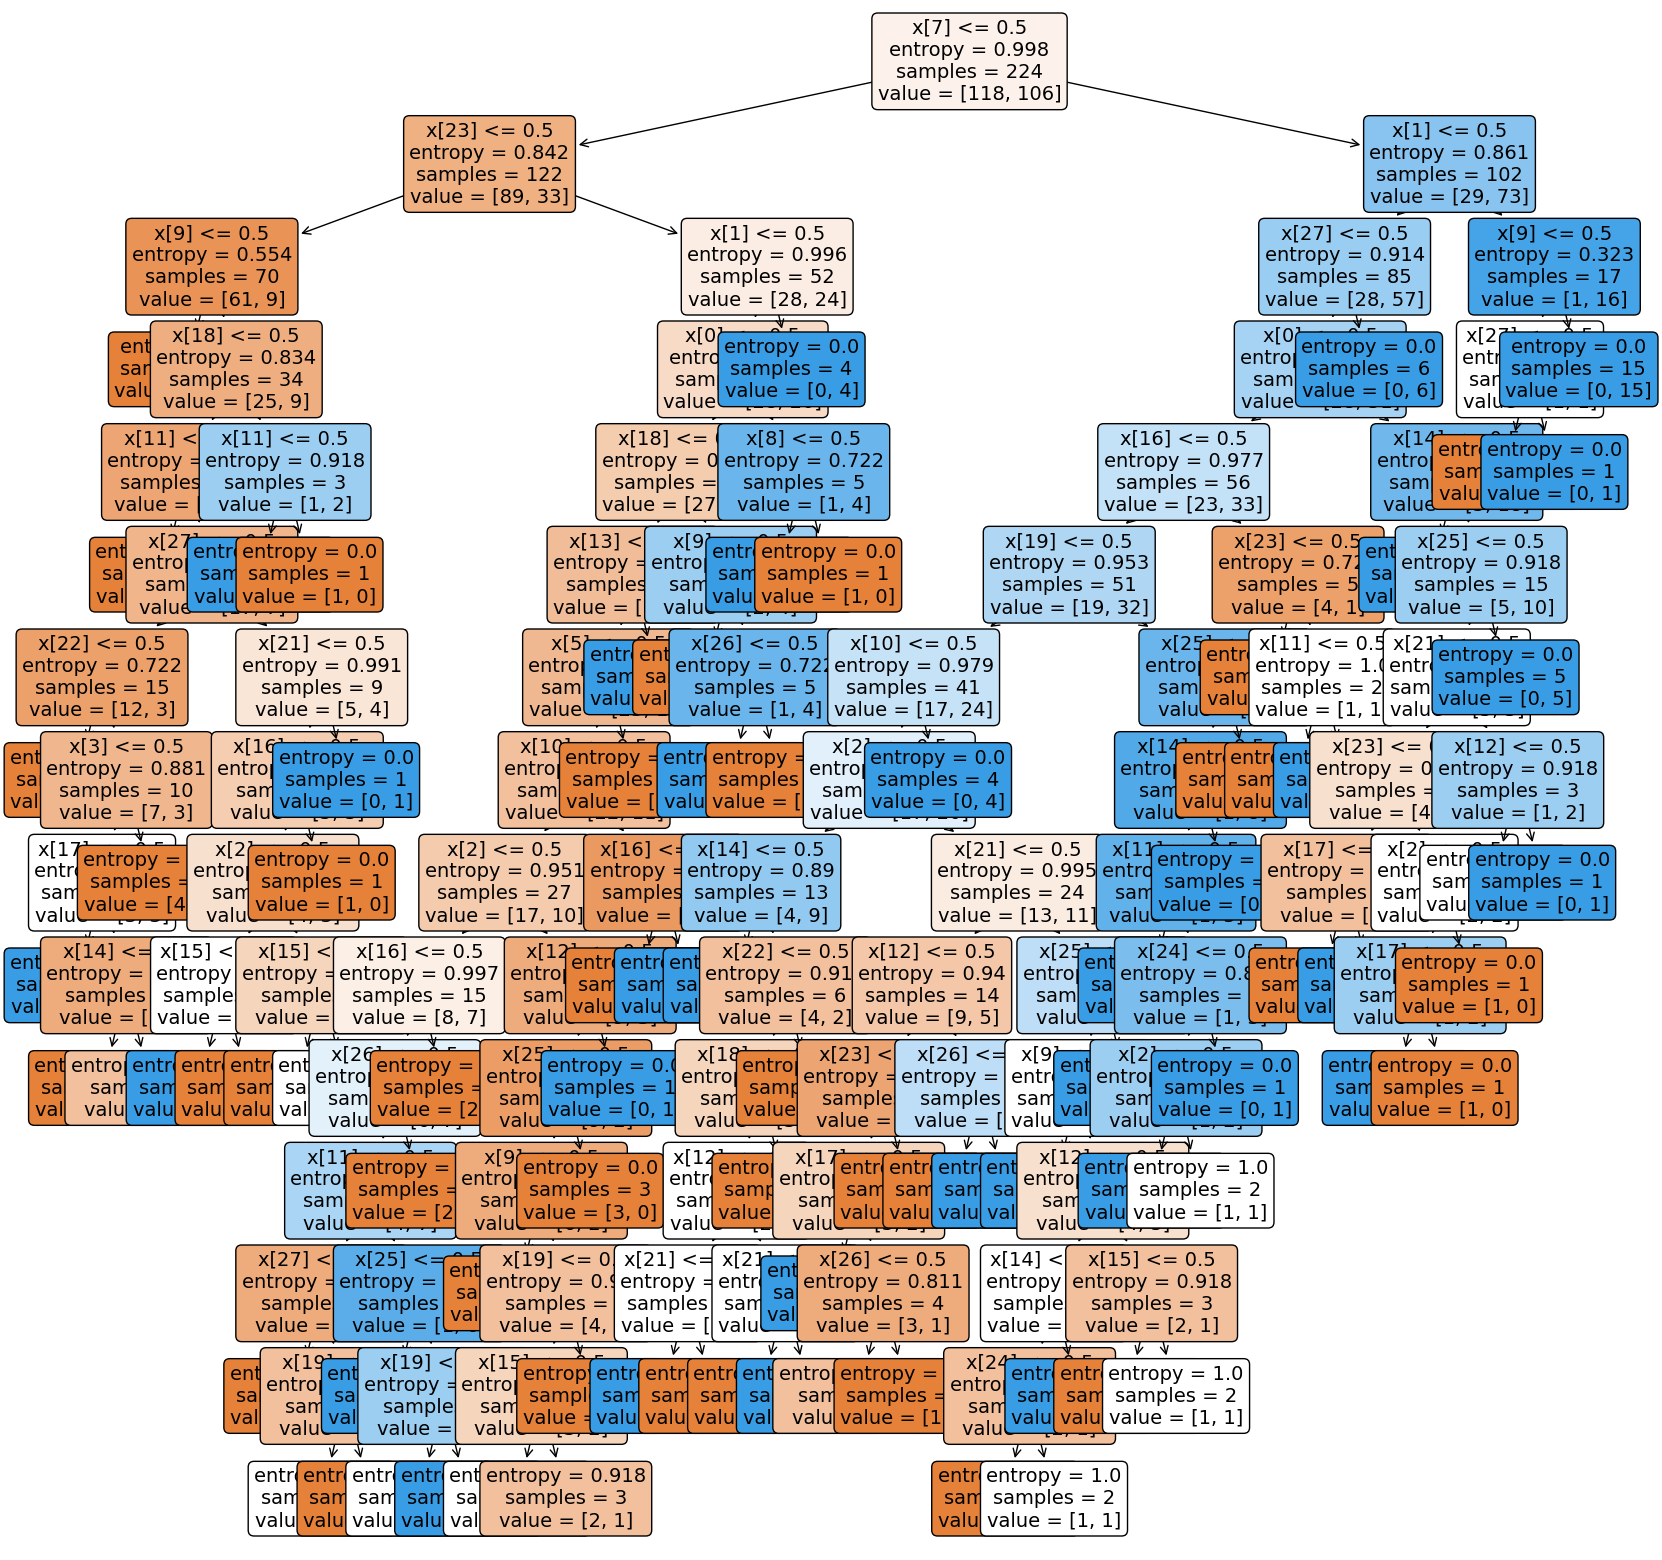

In [57]:
# Plota a árvore de decisão do TreeClassifier

clf.plot()

### **Analisando o `y_predict`**

In [58]:
print(f'Número total de predições: {clf.y_est.shape[0]}')
print(f'Número de predições para AVC (positivo): {np.sum(clf.y_est > 0)}')
print(f'Número de predições para não AVC (negativo): {np.sum(clf.y_est < 0)}')

Número total de predições: 224
Número de predições para AVC (positivo): 85
Número de predições para não AVC (negativo): 139


### **Analisando (novamente) a Hipótese Nula**

Agora com poda nos dados.

In [59]:
# Descobre se temos mais 1s ou -1s no y_test

print(f'Number of 1s in y_test: {np.sum(clf.y_test == 1)}')
print(f'Number of -1s in y_test: {np.sum(clf.y_test == -1)}')

# Cria um Numpy array do tamanho do y_test com apenas 1s

y_test = np.ones(clf.y_test.shape) * 1

# Compara a acurácia do classificador com um que chuta 1 para tudo

print(f'\nTreeClassifier accuracy vs. 1s classifier accuracy: {clf.accuracy() * 100 :.2f}% vs. {np.mean(np.sign(clf.y_test)==np.sign(y_test)) * 100 :.2f}%')

Number of 1s in y_test: 103
Number of -1s in y_test: 121

TreeClassifier accuracy vs. 1s classifier accuracy: 66.07% vs. 45.98%


-------

# **Calculando as Features de Maior Importância**

Para cada classificador, rodamos 100 vezes e armazenamos as top 5 features que o classificador julgou como as que mais causam AVC's.

Nessa tarefa, usaremos o DataFrame com poda, para analisar uma situação mais equilibrada e mais realista, que contém o mínimo de *bias* possível.

### Classificador Linear

In [60]:
# Carrega o DataFrame

df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

# Poda o DataFrame para ter o mesmo número de stroke = 1 e stroke = 0

df = df[df['stroke'] == 1].append(df[df['stroke'] == 0].sample(n=df[df['stroke'] == 1].shape[0]))

C:\Users\neodr\AppData\Local\Temp\ipykernel_4852\1887799411.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df[df['stroke'] == 1].append(df[df['stroke'] == 0].sample(n=df[df['stroke'] == 1].shape[0]))


In [86]:
# Roda o classificador linear cem vezes e salva em um dataframe as 5 features mais importantes

df_top_linear = pd.DataFrame(columns=['Feature', 'Points'])
for i in range(100):
    clf = LinearClassifier(df)
    clf.fit()
    clf.score()
    
    indices = np.argsort(clf.w.T)[-5:]
    for j in range(1, 6):
        feature = clf.X.columns[indices[0][-j]]
        if feature in df_top_linear['Feature'].values:
            df_top_linear.loc[feature, 'Points'] += j
        else:
            df_top_linear.loc[feature, 'Feature'] = feature
            df_top_linear.loc[feature, 'Points'] = j

In [87]:
df_top_linear = df_top_linear.groupby('Feature').sum().sort_values(by='Points', ascending=False)

df_top_linear.head(10)

,Points
Feature,
age_elder,146
avg_glucose_level_high,88
work_type_children,71
work_type_Never_worked,70
bmi_overweight,68
Residence_type_Urban,65
ever_married_Yes,63
work_type_Self-employed,62
smoking_status_smokes,62


### Classificador por Árvore de Decisão

In [94]:
# Roda o classificador por árvore cem vezes e salva em um dataframe as 5 features mais importantes

df_top_tree = pd.DataFrame(columns=['Feature', 'Points'])
for i in range(100):
    clf = TreeClassifier(df)
    clf.fit()
    clf.score()
    
    indices = np.argsort(clf.tree.feature_importances_)[-5:]
    for j in range(1, 6):
        feature = clf.X.columns[indices[j - 1]]
        if feature in df_top_tree['Feature'].values:
            df_top_tree.loc[feature, 'Points'] += j
        else:
            df_top_tree.loc[feature, 'Feature'] = feature
            df_top_tree.loc[feature, 'Points'] = j

In [95]:
df_top_tree = df_top_tree.groupby('Feature').sum().sort_values(by='Points', ascending=False)

df_top_tree.head(10)

,Points
Feature,
age_elder,495
age_adult,184
bmi_obese,99
hypertension,88
bmi_normal,78
ever_married_Yes,52
avg_glucose_level_normal,51
work_type_Private,43
smoking_status_never smoked,40


### Juntando os scores

In [96]:
# Junta os dois dataframes e ordena por pontos

df_final = df_top_linear.append(df_top_tree).groupby('Feature').sum().sort_values(by='Points', ascending=False) 

df_final.head(10)

C:\Users\neodr\AppData\Local\Temp\ipykernel_4852\1493593643.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_top_linear.append(df_top_tree).groupby('Feature').sum().sort_values(by='Points', ascending=False)


,Points
Feature,
age_elder,641
age_adult,230
bmi_obese,159
hypertension,123
ever_married_Yes,115
bmi_overweight,104
work_type_Private,103
bmi_normal,101
Residence_type_Urban,100
